In [ ]:
#CIFAR10 dataset uing CNN 
#Base code for reference

import tensorflow as tf 
import pandas as pd 
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


def main():
    # load CIFAR10 dataset 
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    """
        Normalize pixel values to be between 0 and 1Normalize pixel values to be between 0 and 1
    """
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # print head
    print("----------- Train Data -----------")
    print(x_train[:1])
    print("----------- Test Data -----------")
    print(x_test[:1])

    """
        This plots a 5x5 grid of the first 25 images in the 
        training set, along with their corresponding labels.
    """
    y_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i])
        plt.xlabel(y_names[y_train[i][0]])
    plt.show()

    """
        This defines the CNN architecture using 
        tf.keras.models.Sequential(), adding convolutional 
        layers and pooling layers. It also prints a summary 
        of the model's layers and parameters.
    """
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.summary()

    """
        This defines the CNN architecture 
        using tf.keras.models.Sequential(), 
        adding convolutional layers and pooling layers. 
        It also prints a summary 
        of the model's layers and parameters.

        This adds fully connected layers to 
        the model and prints a summary of the updated model.
    """

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    model.summary()

    """
        This compiles the model, specifying the 
        Adam optimizer, sparse categorical cross-entropy loss, 
        and accuracy as the evaluation metric.
    """
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    """
        This trains the model on the training set for 10 epochs, 
        validating on the test set, 
        and saves the training history in the history variable.
    """
    history = model.fit(x_train, y_train, epochs=50,
                        validation_data=(x_test, y_test))

    """
        This plots the training and validation accuracy over epochs.
    """
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

   
    """
        This evaluates the final performance of the model on the
    """
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)


if __name__ == "__main__":
    main()

Number of training images: 50000
Number of test images: 10000


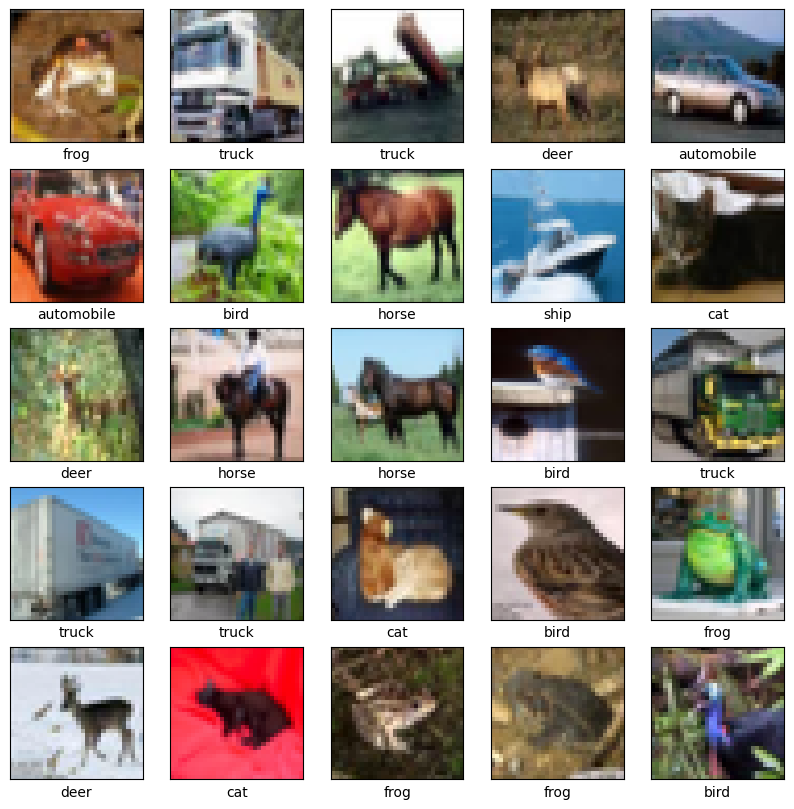

C:\Users\ravi\AppData\Local\Temp\ipykernel_14112\1772281865.py:44: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Epoch 1/50


c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 324s 780ms/step - accuracy: 0.5070 - loss: 1.4738 - val_accuracy: 0.7072 - val_loss: 0.8788
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 332s 845ms/step - accuracy: 0.7185 - loss: 0.8194 - val_accuracy: 0.7408 - val_loss: 0.7714
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 312s 794ms/step - accuracy: 0.7589 - loss: 0.7013 - val_accuracy: 0.7882 - val_loss: 0.6617
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 283s 720ms/step - accuracy: 0.7785 - loss: 0.6406 - val_accuracy: 0.7380 - val_loss: 0.8381
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 232s 592ms/step - accuracy: 0.7964 - loss: 0.5905 - val_accuracy: 0.7783 - val_loss: 0.7048
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 260s 663ms/step - accuracy: 0.8121 - loss: 0.5505 - val_accuracy: 0.7783 - val_loss: 0.6735
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 355s 902ms/step - accuracy: 0.8149 - loss: 0.5403 - val_accuracy: 0.7909 - val_loss: 0.6534
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 306s 774ms/step - accuracy: 0.8232 - loss: 0.51

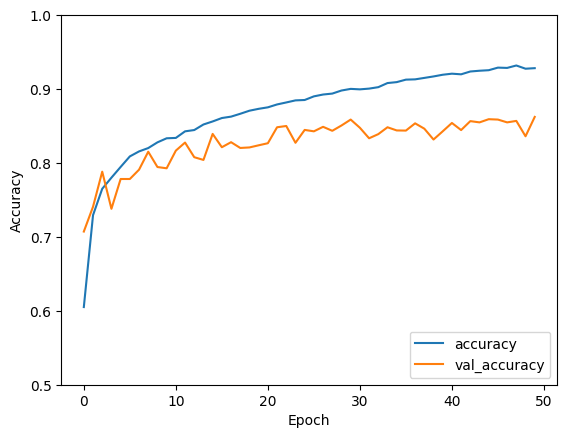

313/313 - 17s - 54ms/step - accuracy: 0.8623 - loss: 0.4710

Test accuracy: 86.23% 
Test Loss: 47.10%


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet #type:ignore
from tensorflow.keras.applications.mobilenet import preprocess_input #type:ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator #type:ignore
from tensorflow.keras.preprocessing.image import array_to_img #type:ignore
from tensorflow.keras import layers, models #type:ignore
from tensorflow.keras.datasets import cifar10 #type:ignore

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between -1 and 1 for MobileNet
x_train = preprocess_input(x_train.astype(np.float32))
x_test = preprocess_input(x_test.astype(np.float32))

# Print the number of images in the training and test datasets
print("Number of training images:", len(x_train))
print("Number of test images:", len(x_test))

# Plot a 5x5 grid of the first 25 images in the training set
y_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(array_to_img(x_train[i]))
    plt.xlabel(y_names[y_train[i][0]])
plt.show()

# Data augmentation to improve generalization
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Define the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model with additional parameters
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

"""# Learning rate scheduler to dynamically adjust learning rate
def lr_scheduler(epoch, lr):
    if epoch > 20:
        return lr * 0.5
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Early stopping to prevent overfitting
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)"""

# Train the model with batch size, data augmentation, and callbacks
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=50,
                    validation_data=(x_test, y_test),
)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc * 100:.2f}% \nTest Loss: {test_loss * 100:.2f}%')
